## Document Similarity

In [1]:
!pip install nltk

In [2]:
import text_transformer

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Exercise 1:
Plot an histogram of the word vocabulary of “Alice in Wonderland”.
(number of words vs. frequency). (bins of size 1).

In [3]:
import nltk
nltk.download("gutenberg")
nltk.download("punkt")
alice = "carroll-alice.txt"
sents = nltk.corpus.gutenberg.sents(alice)

[nltk_data] Downloading package gutenberg to /home/jovyan/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Colect occurrences

In [30]:
flatten = text_transformer.flatten(sents)
size = len(flatten)
ocorrences = text_transformer.count_frequencies(flatten)

print("Tokens",size)
print("Distinct tokens",len(ocorrences))

Tokens 34113
Distinct tokens 3015


__Sort by occurrences__

In [32]:
ocorrences.sort(reverse=True, key=lambda token_count: token_count[1])

print("5 most frequent tokens",ocorrences[0:5])

5 most frequent tokens [(',', 1993), ("'", 1732), ('the', 1527), ('and', 802), ('.', 764)]


#### Make the the plot

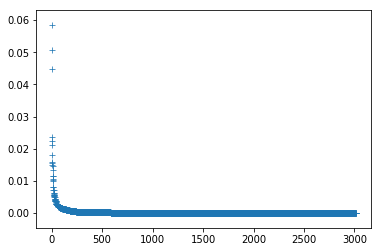

In [33]:
import seaborn as sns

frequencies = [ token_count[1]/size for token_count in ocorrences]
sns.scatterplot(x=range(0,len(ocorrences)), y=frequencies, marker='+')

### Exercise 2: 
Then process the text: normalize, lemmatize, stop word removal, etc..
and plot the histogram again. (use nltk implementation). What happened? Describe
what changed in the frequency distribution of words.

#### Apply processing to tokens and collect occurrences

In [34]:
processed_tokens = text_transformer.normalizer(flatten)
processed_tokens = text_transformer.lemmatizer(processed_tokens) 
processed_ocorrences = text_transformer.count_frequencies(processed_tokens)


print("Tokens",len(processed_tokens))
print("Distinct tokens",len(processed_ocorrences))

Tokens 13946
Distinct tokens 2339


__Sort occurrences__

In [37]:
processed_ocorrences.sort(reverse=True, key=lambda token_count: token_count[1])
print("5 most frequent tokens",processed_ocorrences[0:5])

5 most frequent tokens [('i', 543), ('said', 462), ('alice', 398), ('little', 128), ('the', 115)]


#### Make the plot

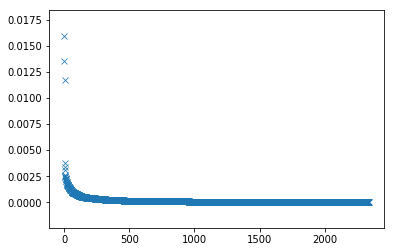

In [14]:
import seaborn as sns

processed_frequencies = [word[1]/size for word in processed_ocorrences]
sns.scatterplot(x=range(0,len(processed_ocorrences)), y=processed_frequencies, marker='x')

### Exercise 3:
Build the term-document matrix for the collection in “books”.Find the most similar document content to the “Alice in Wonderland” using tf-idf and cosine similarity.

In [1]:
import text_transformer as tt

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
books = ['shakespeare-macbeth.txt',
         'chesterton-ball.txt',
         'melville-moby_dick.txt',
         'austen-sense.txt',
         'carroll-alice.txt']

# inspired by https://medium.freecodecamp.org/how-to-process-textual-data-using-tf-idf-in-python-cd2bbc0a94a3

In [4]:
book_list = {"macbeth": nltk.corpus.gutenberg.sents(books[0]),
             "ball": nltk.corpus.gutenberg.sents(books[1]),
             "moby_dick": nltk.corpus.gutenberg.sents(books[2]), 
             "sense": nltk.corpus.gutenberg.sents(books[3]),
             "alice":nltk.corpus.gutenberg.sents(books[4])}

In [6]:
for key, val in book_list.items():
    book_list[key] = list(tt.flatten(val))

In [8]:
for key, val in book_list.items():
    book_list[key] = tt.normalizer(val)

In [26]:
# the term frequency measures how often a term occurs in a document
# formula: number of word occurences/total number words
def computeTF (word_dict, bow):
    tfDict = {}
    bowCount = len(bow)
    for word, count in word_dict:
        tfDict[word] = count/float(bowCount)
    
    return tfDict

In [50]:
# the IDF (inverted document frequency) is measuring the frequency a word exists in a document and invert this number
# formula: log(total number of documents/number of documents the word exist in)
def computeIDF (docDict):
    doclist = docDict.values() #transform the dict into a list
    import math
    idfDict = {}
    N = len(doclist) # get number of docs in collection
    
    for doc in doclist:
        for word in set(doc): #the set is necessary to get only distinct words from each document

            if word in idfDict:     # increment the count by one for each document 
                idfDict[word] += 1  # if the word hasn't been added to the dict yet, do
            else:
                idfDict[word] = 1

    for word, val in idfDict.items():
        idfDict[word] = math.log10(N/float(val)) #  <- magic formula
    
    return idfDict

In [80]:
#
# formula: (1+ log(TF)) * IDF
def computeTFIDF(tfDict, idfDict):
    import math
    tfidf = {}
    for word, val in tfDict.items():
        print(word)
        print(val)
        print(idfDict[word])
        print((1 + math.log10(val))*idfDict[word])
        tfidf[word] = (1 + math.log10(val))*idfDict[word]
        
    return tfidf

In [20]:
alice_freq = tt.count_frequencies(book_list["alice"])

In [27]:
alice_TF = computeTF(alice_freq, book_list["alice"])

In [51]:
IDF = computeIDF(book_list)

In [77]:
IDF

{'bee': 0.22184874961635637,
 'treasonous': 0.6989700043360189,
 'gospell': 0.6989700043360189,
 'affear': 0.6989700043360189,
 'lo': 0.3979400086720376,
 'hound': 0.6989700043360189,
 'lees': 0.3979400086720376,
 'challenge': 0.22184874961635637,
 'rost': 0.6989700043360189,
 'cozen': 0.6989700043360189,
 'youths': 0.6989700043360189,
 'hew': 0.6989700043360189,
 'sun': 0.0,
 'satisfie': 0.6989700043360189,
 'gold': 0.09691001300805642,
 'solely': 0.09691001300805642,
 'hidden': 0.22184874961635637,
 'temple': 0.09691001300805642,
 'flowt': 0.6989700043360189,
 'skipping': 0.6989700043360189,
 'woman': 0.0,
 'belzebub': 0.6989700043360189,
 'truth': 0.0,
 'guest': 0.3979400086720376,
 'do': 0.0,
 'confident': 0.22184874961635637,
 'prou': 0.6989700043360189,
 'cruelty': 0.09691001300805642,
 'happinesse': 0.6989700043360189,
 'desart': 0.6989700043360189,
 'shield': 0.09691001300805642,
 'protest': 0.22184874961635637,
 'censures': 0.6989700043360189,
 'teares': 0.6989700043360189,
 '

KeyError: 'treasonous'

In [81]:
computeTFIDF(alice_TF, IDF)

delightful
0.0001434102968593145
0.22184874961635637
-0.6308090973602697
bee
7.170514842965726e-05
0.22184874961635637
-0.6975922254953413
grazed
7.170514842965726e-05
0.3979400086720376
-1.2513023253149558
timidly
0.0006453463358669152
0.3979400086720376
-0.8715710528334437
underneath
7.170514842965726e-05
0.22184874961635637
-0.6975922254953413
brown
0.0001434102968593145
0.09691001300805642
-0.27555583674237205
fanned
7.170514842965726e-05
0.6989700043360189
-2.197875993091928
sun
0.0001434102968593145
0.0
-0.0
waters
7.170514842965726e-05
0.22184874961635637
-0.6975922254953413
dodo
0.0009321669295855443
0.6989700043360189
-1.4192630032999385
goldfish
0.0001434102968593145
0.6989700043360189
-1.987465055717403
every
0.000860461781155887
0.09691001300805642
-0.2001451889454578
spectacles
0.00021511544528897175
0.22184874961635637
-0.591743471720397
woman
0.0001434102968593145
0.0
-0.0
walrus
7.170514842965726e-05
0.3979400086720376
-1.2513023253149558
frighten
7.170514842965726e-05


eel
0.0001434102968593145
0.3979400086720376
-1.1315104462298875
music
0.00021511544528897175
0.09691001300805642
-0.2584908305366809
choosing
7.170514842965726e-05
0.6989700043360189
-2.197875993091928
fright
0.0001434102968593145
0.0
-0.0
straightened
7.170514842965726e-05
0.3979400086720376
-1.2513023253149558
annoy
7.170514842965726e-05
0.6989700043360189
-2.197875993091928
died
7.170514842965726e-05
0.09691001300805642
-0.30472865753798367
hung
7.170514842965726e-05
0.09691001300805642
-0.30472865753798367
buttercup
7.170514842965726e-05
0.6989700043360189
-2.197875993091928
sticks
7.170514842965726e-05
0.22184874961635637
-0.6975922254953413
hunting
0.00021511544528897175
0.3979400086720376
-1.0614366890741995
hit
0.0001434102968593145
0.0
-0.0
anxiously
0.0010038720780152016
0.22184874961635637
-0.44332515387987337
foolish
7.170514842965726e-05
0.0
-0.0
altered
7.170514842965726e-05
0.09691001300805642
-0.30472865753798367
when
0.0007170514842965725
0.0
-0.0
brave
7.170514842965

-0.591743471720397
oblong
7.170514842965726e-05
0.22184874961635637
-0.6975922254953413
circle
7.170514842965726e-05
0.09691001300805642
-0.30472865753798367
go
0.0035852574214828626
0.0
-0.0
nurse
0.00021511544528897175
0.09691001300805642
-0.2584908305366809
subdued
7.170514842965726e-05
0.09691001300805642
-0.30472865753798367
field
7.170514842965726e-05
0.0
-0.0
carefully
0.00021511544528897175
0.09691001300805642
-0.2584908305366809
wig
0.0001434102968593145
0.3979400086720376
-1.1315104462298875
snappishly
7.170514842965726e-05
0.6989700043360189
-2.197875993091928
can
0.0004302308905779435
0.0
-0.0
advice
0.0001434102968593145
0.09691001300805642
-0.27555583674237205
course
0.0018643338591710886
0.0
-0.0
blasts
0.0001434102968593145
0.22184874961635637
-0.6308090973602697
various
7.170514842965726e-05
0.09691001300805642
-0.30472865753798367
whistling
7.170514842965726e-05
0.22184874961635637
-0.6975922254953413
steady
7.170514842965726e-05
0.09691001300805642
-0.304728657537983

-1.2513023253149558
hedgehog
0.0005019360390076008
0.3979400086720376
-0.9150040039429601
tale
0.000286820593718629
0.0
-0.0
severity
7.170514842965726e-05
0.22184874961635637
-0.6975922254953413
bats
0.000286820593718629
0.3979400086720376
-1.0117185671448192
indignantly
0.000286820593718629
0.22184874961635637
-0.5640259692251983
fur
0.00021511544528897175
0.22184874961635637
-0.591743471720397
common
7.170514842965726e-05
0.0
-0.0
buttons
7.170514842965726e-05
0.22184874961635637
-0.6975922254953413
climb
7.170514842965726e-05
0.22184874961635637
-0.6975922254953413
across
0.00035852574214828624
0.09691001300805642
-0.2369914653255388
upset
0.00021511544528897175
0.3979400086720376
-1.0614366890741995
thinking
0.0007887566327262297
0.09691001300805642
-0.20380727887280525
folding
7.170514842965726e-05
0.22184874961635637
-0.6975922254953413
screaming
7.170514842965726e-05
0.22184874961635637
-0.6975922254953413
tide
7.170514842965726e-05
0.22184874961635637
-0.6975922254953413
furro

0.22184874961635637
-0.6975922254953413
contemptuous
7.170514842965726e-05
0.22184874961635637
-0.6975922254953413
begged
7.170514842965726e-05
0.22184874961635637
-0.6975922254953413
memorandum
7.170514842965726e-05
0.6989700043360189
-2.197875993091928
it
0.004875950093216693
0.0
-0.0
dozing
7.170514842965726e-05
0.6989700043360189
-2.197875993091928
worse
0.00021511544528897175
0.0
-0.0
ways
7.170514842965726e-05
0.09691001300805642
-0.30472865753798367
nasty
7.170514842965726e-05
0.09691001300805642
-0.30472865753798367
everybody
0.000573641187437258
0.09691001300805642
-0.21721019515114887
men
7.170514842965726e-05
0.0
-0.0
filled
0.00021511544528897175
0.09691001300805642
-0.2584908305366809
editions
0.0001434102968593145
0.22184874961635637
-0.6308090973602697
actually
7.170514842965726e-05
0.09691001300805642
-0.30472865753798367
arrum
7.170514842965726e-05
0.6989700043360189
-2.197875993091928
faster
0.00021511544528897175
0.09691001300805642
-0.2584908305366809
terribly
7.170

{'delightful': -0.6308090973602697,
 'bee': -0.6975922254953413,
 'grazed': -1.2513023253149558,
 'timidly': -0.8715710528334437,
 'underneath': -0.6975922254953413,
 'brown': -0.27555583674237205,
 'fanned': -2.197875993091928,
 'sun': -0.0,
 'waters': -0.6975922254953413,
 'dodo': -1.4192630032999385,
 'goldfish': -1.987465055717403,
 'every': -0.2001451889454578,
 'spectacles': -0.591743471720397,
 'woman': -0.0,
 'walrus': -1.2513023253149558,
 'frighten': -0.6975922254953413,
 'shining': -0.6975922254953413,
 'do': -0.0,
 'truth': -0.0,
 'ornamented': -0.6308090973602697,
 'waste': -0.6975922254953413,
 'remain': -0.30472865753798367,
 'pitied': -0.6975922254953413,
 'sort': -0.17864582373431562,
 'educations': -2.197875993091928,
 'agony': -0.30472865753798367,
 'doze': -1.2513023253149558,
 'christmas': -0.6975922254953413,
 'nest': -0.30472865753798367,
 'wrong': -0.2369914653255388,
 'breathe': -0.591743471720397,
 'lifted': -0.30472865753798367,
 'holding': -0.258490830536680

In [84]:
(1 + math.log10(0.0001434102968593145))*0.22184874961635637

-0.6308090973602697

In [86]:
math.log10(0.0001434102968593145)

-3.843419665204918

In [ ]:
trial_text = "Hello"

In [ ]:
punct = "\{}".format("|\\".join(string.punctuation))

In [ ]:
punct

In [ ]:
import re 
if not re.search( r'{} +'.format(punct), trial_text):
    print("Match")
elif re.search( r'{} +'.format(punct), trial_text) == False:
    print("No Match")
else:
    print("You're an idiot")

In [ ]:
r'{}+'.format(punct)